<a href="https://colab.research.google.com/github/Devika2605/crop_and_weed_detection/blob/main/crop_and_weed_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Clone YOLOv5 repo
!git clone https://github.com/ultralytics/yolov5
%cd yolov5
!pip install -r requirements.txt


Cloning into 'yolov5'...
remote: Enumerating objects: 17488, done.
remote: Counting objects: 100% (2/2), done.
remote: Compressing objects: 100% (2/2), done.
remote: Total 17488 (delta 0), reused 0 (delta 0), pack-reused 17486 (from 2)
Receiving objects: 100% (17488/17488), 16.55 MiB | 10.88 MiB/s, done.
Resolving deltas: 100% (11995/11995), done.
/content/yolov5
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 123.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 91.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 53.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 17.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.3 MB/s eta 0:0

In [ ]:
import os
import shutil

# Paths
src_folder = '/content/dataset'
img_folder = '/content/dataset/images'
label_folder = '/content/dataset/labels'

# Create destination folders
os.makedirs(img_folder, exist_ok=True)
os.makedirs(label_folder, exist_ok=True)

# Move files
for file in os.listdir(src_folder):
    full_path = os.path.join(src_folder, file)
    if file.endswith(('.jpeg', '.jpg', '.png')):
        shutil.move(full_path, os.path.join(img_folder, file))
    elif file.endswith('.txt'):
        shutil.move(full_path, os.path.join(label_folder, file))

print("✅ Files sorted into images/ and labels/")


✅ Files sorted into images/ and labels/


In [ ]:
yaml_content = """
train: ../dataset/images
val: ../dataset/images  # same set for now
nc: 2
names: ['crop', 'weed']
"""

with open("crop_weed.yaml", "w") as f:
    f.write(yaml_content)


In [ ]:
!python train.py --img 512 --batch 16 --epochs 50 --data crop_weed.yaml --weights yolov5s.pt --project crop-weed-detect


Streaming output truncated to the last 5000 lines.
      19/49      2.77G    0.03494    0.01857   0.003758         52        512:  41% 32/79 [00:08<00:10,  4.30it/s]/content/yolov5/train.py:412: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(amp):
      19/49      2.77G    0.03499    0.01848   0.003668         43        512:  42% 33/79 [00:08<00:12,  3.79it/s]/content/yolov5/train.py:412: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(amp):
      19/49      2.77G    0.03502    0.01867   0.003606         63        512:  43% 34/79 [00:09<00:12,  3.67it/s]/content/yolov5/train.py:412: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(amp):
      19/49      2.77G    0.03512    

In [ ]:
!python detect.py --weights crop-weed-detect/exp/weights/best.pt --img 512 --source ../dataset/images


detect: weights=['crop-weed-detect/exp/weights/best.pt'], source=../dataset/images, data=data/coco128.yaml, imgsz=[512, 512], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_format=0, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-420-g0c99ce80 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)

Fusing layers... 
Model summary: 157 layers, 7015519 parameters, 0 gradients, 15.8 GFLOPs
image 1/1250 /content/dataset/images/agri_0_1083.jpeg: 512x512 1 crop, 8.1ms
image 2/1250 /content/dataset/images/agri_0_1258.jpeg: 512x512 1 weed, 7.8ms
image 3/1250 /content/dataset/images/agri_0_126.jpeg: 512x512 4 weeds, 7.6ms
image 4/1250 /content/dataset/images/agri_0_1260.jpeg: 512x512 2 crops, 7.6ms
i

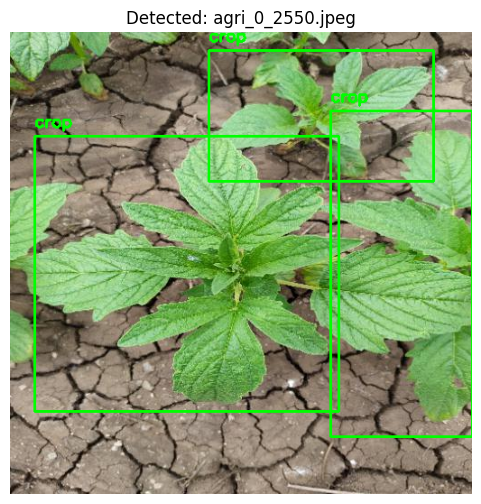

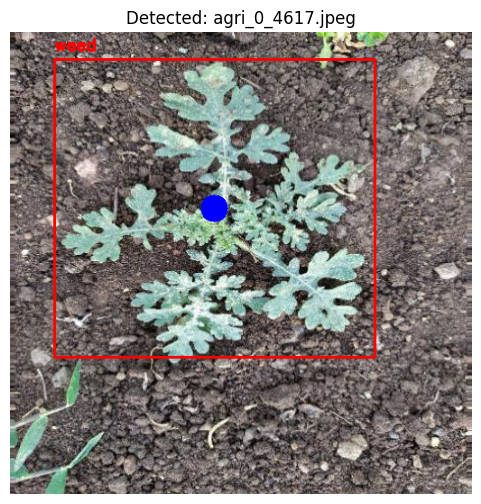

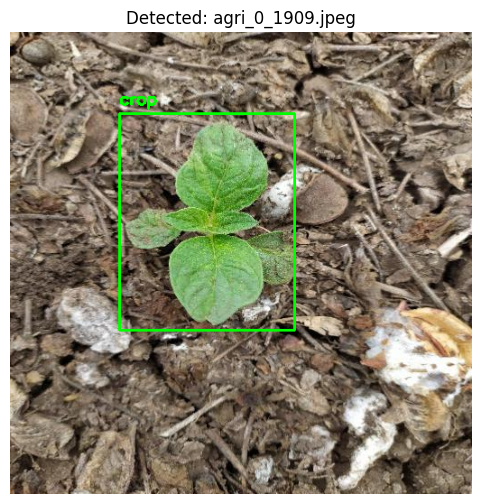

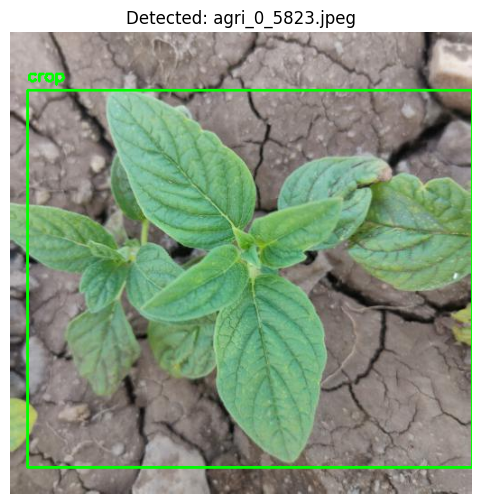

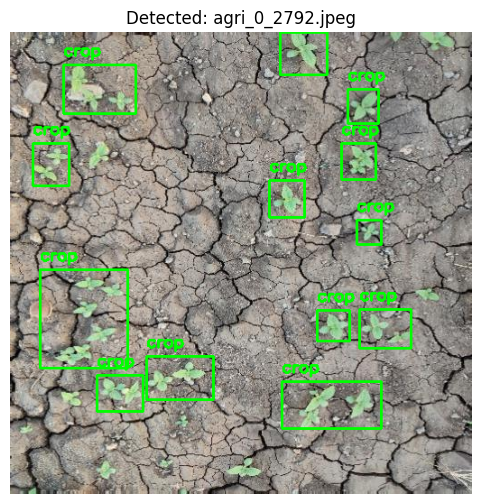

In [ ]:
import os
import cv2
import matplotlib.pyplot as plt

# Class map
class_map = {0: 'crop', 1: 'weed'}
colors = {'crop': (0, 255, 0), 'weed': (0, 0, 255)}

# Paths
img_dir = '/content/dataset/images'
label_dir = '/content/dataset/labels'

# Pick a few images to visualize
sample_images = os.listdir(img_dir)[:5]  # Show first 5 images

for img_name in sample_images:
    img_path = os.path.join(img_dir, img_name)
    label_path = os.path.join(label_dir, os.path.splitext(img_name)[0] + ".txt")

    image = cv2.imread(img_path)
    h, w = image.shape[:2]

    # Read label file
    if not os.path.exists(label_path):
        continue
    with open(label_path, "r") as f:
        lines = f.readlines()

    for line in lines:
        cls, x_center, y_center, bw, bh = map(float, line.strip().split())
        class_name = class_map[int(cls)]

        # Denormalize
        x1 = int((x_center - bw/2) * w)
        y1 = int((y_center - bh/2) * h)
        x2 = int((x_center + bw/2) * w)
        y2 = int((y_center + bh/2) * h)

        # Draw rectangle
        cv2.rectangle(image, (x1, y1), (x2, y2), colors[class_name], 2)
        cv2.putText(image, class_name, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.6, colors[class_name], 2)

        # Spray Simulation for weed
        if class_name == "weed":
            cv2.circle(image, (int(x_center * w), int(y_center * h)), 15, (255, 0, 0), -1)  # blue spray marker

    # Convert BGR to RGB
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Plot
    plt.figure(figsize=(6, 6))
    plt.imshow(image_rgb)
    plt.title(f"Detected: {img_name}")
    plt.axis("off")
    plt.show()


In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# Paths
label_dir = '/content/dataset/labels'
class_map = {0: 'crop', 1: 'weed'}

# Data containers
summary_data = []

# Process all label files
for label_file in os.listdir(label_dir):
    if label_file.endswith('.txt'):
        filepath = os.path.join(label_dir, label_file)
        with open(filepath, 'r') as f:
            lines = f.readlines()

        crop_count = 0
        weed_count = 0
        for line in lines:
            cls = int(line.strip().split()[0])
            if cls == 0:
                crop_count += 1
            elif cls == 1:
                weed_count += 1

        summary_data.append({
            'Image Name': os.path.splitext(label_file)[0] + '.jpeg',  # or .jpg/.png
            'Crop Count': crop_count,
            'Weed Count': weed_count
        })

# Create DataFrame
df_summary = pd.DataFrame(summary_data)

# Show table
print("📋 Batch Summary Table:")
display(df_summary.head(10))  # First 10 rows

# Save to CSV (optional)
df_summary.to_csv('crop_weed_summary.csv', index=False)


📋 Batch Summary Table:


Image Name  Crop Count  Weed Count
0  agri_0_1830.jpeg           1           0
1  agri_0_8341.jpeg           1           0
2  agri_0_1960.jpeg           1           0
3  agri_0_4571.jpeg           0           4
4  agri_0_7284.jpeg           1           0
5  agri_0_9148.jpeg           0           2
6  agri_0_7241.jpeg           0           1
7  agri_0_9892.jpeg           0           1
8   agri_0_318.jpeg           2           0
9  agri_0_1932.jpeg           1           0

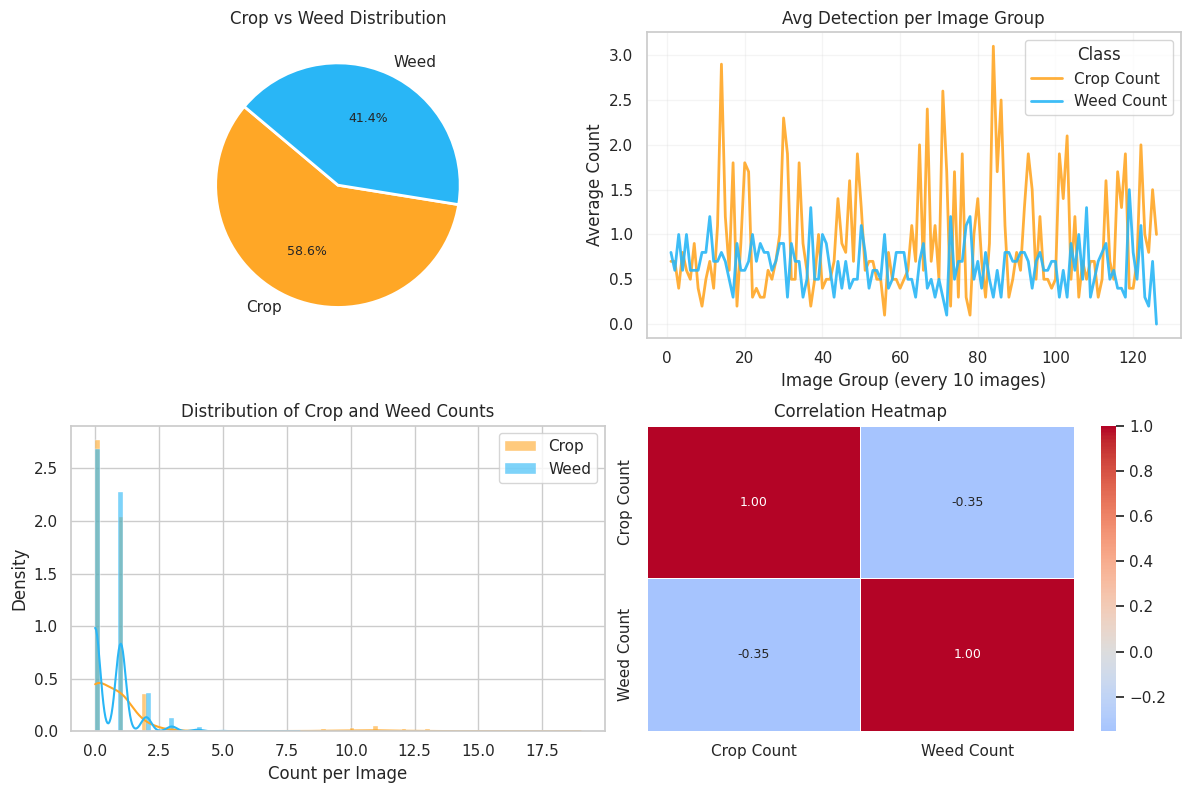

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Theme and Font
sns.set_theme(style="whitegrid")
plt.rcParams.update({'font.size': 9})

# Colors
orange = '#FFA726'      # Crop
light_blue = '#29B6F6'  # Weed
colors = [orange, light_blue]

# Preprocessing
df_summary['Image Index'] = range(1, len(df_summary) + 1)
df_summary['Group'] = pd.cut(df_summary['Image Index'], bins=np.arange(0, len(df_summary)+10, 10), labels=False)
group_avg = df_summary.groupby('Group')[['Crop Count', 'Weed Count']].mean().reset_index()
group_avg['Group'] = group_avg['Group'] + 1
df_long = pd.melt(group_avg, id_vars='Group', value_vars=['Crop Count', 'Weed Count'],
                  var_name='Class', value_name='Average Count')

# Totals
total_crop = df_summary['Crop Count'].sum()
total_weed = df_summary['Weed Count'].sum()
corr = df_summary[['Crop Count', 'Weed Count']].corr()

# Plot Layout
fig, axs = plt.subplots(2, 2, figsize=(12, 8))  # Smaller figure
plt.subplots_adjust(hspace=0.4, wspace=0.3)

# Pie Chart
axs[0, 0].pie([total_crop, total_weed],
              labels=['Crop', 'Weed'],
              autopct='%1.1f%%',
              startangle=140,
              colors=colors,
              wedgeprops={'edgecolor': 'white', 'linewidth': 2})
axs[0, 0].set_title("Crop vs Weed Distribution")

# Line Plot
sns.lineplot(ax=axs[0, 1],
             data=df_long,
             x='Group',
             y='Average Count',
             hue='Class',
             palette=colors,
             linewidth=2,
             errorbar='sd',  # replaces deprecated 'ci'
             alpha=0.9)
axs[0, 1].set_title("Avg Detection per Image Group")
axs[0, 1].set_xlabel("Image Group (every 10 images)")
axs[0, 1].set_ylabel("Average Count")
axs[0, 1].legend(title="Class")
axs[0, 1].grid(alpha=0.2)

# Distribution Plot
sns.histplot(df_summary['Crop Count'], kde=True, color=orange, label='Crop',
             stat='density', alpha=0.6, ax=axs[1, 0])
sns.histplot(df_summary['Weed Count'], kde=True, color=light_blue, label='Weed',
             stat='density', alpha=0.6, ax=axs[1, 0])
axs[1, 0].set_title("Distribution of Crop and Weed Counts")
axs[1, 0].set_xlabel("Count per Image")
axs[1, 0].set_ylabel("Density")
axs[1, 0].legend()

# Heatmap
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0, linewidths=0.5,
            fmt='.2f', ax=axs[1, 1])
axs[1, 1].set_title("Correlation Heatmap")

plt.tight_layout()
plt.show()


In [ ]:
import cv2
import imageio.v2 as imageio
import os
import glob
from IPython.display import Image, display

output_images = []
os.makedirs("spray_frames", exist_ok=True)

# Resize target (smaller size)
resize_dim = (512, 512)

for idx, row in df_summary.iterrows():
    base_name = row['Image Name']
    img_files = glob.glob(f"/content/dataset/images/{base_name}.*")
    if not img_files:
        continue
    img_path = img_files[0]
    label_path = f"/content/dataset/labels/{base_name}.txt"
    if not os.path.exists(label_path):
        continue

    image = cv2.imread(img_path)
    h, w = image.shape[:2]

    with open(label_path) as f:
        for line in f:
            cls, x, y, bw, bh = map(float, line.strip().split())
            class_name = class_map[int(cls)]
            x1 = int((x - bw/2) * w)
            y1 = int((y - bh/2) * h)
            x2 = int((x + bw/2) * w)
            y2 = int((y + bh/2) * h)
            cv2.rectangle(image, (x1, y1), (x2, y2), (0, 255, 0) if class_name == 'crop' else (0, 0, 255), 2)
            cv2.putText(image, class_name, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.6,
                        (0, 255, 0) if class_name == 'crop' else (0, 0, 255), 2)
            if class_name == 'weed':
                cv2.circle(image, (int(x * w), int(y * h)), 10, (255, 0, 0), -1)

    # Resize the image to make the GIF lighter
    resized_image = cv2.resize(image, resize_dim)
    out_path = f"spray_frames/frame_{idx}.jpg"
    cv2.imwrite(out_path, resized_image)
    output_images.append(imageio.imread(out_path))

# Save GIF
if output_images:
    gif_path = "spray_animation.gif"
    imageio.mimsave(gif_path, output_images, fps=1)
    display(Image(filename=gif_path))
    print("✅ GIF 'spray_animation.gif' created and displayed (resized to 512x512).")
else:
    print("⚠️ No matching image-label pairs found for GIF.")


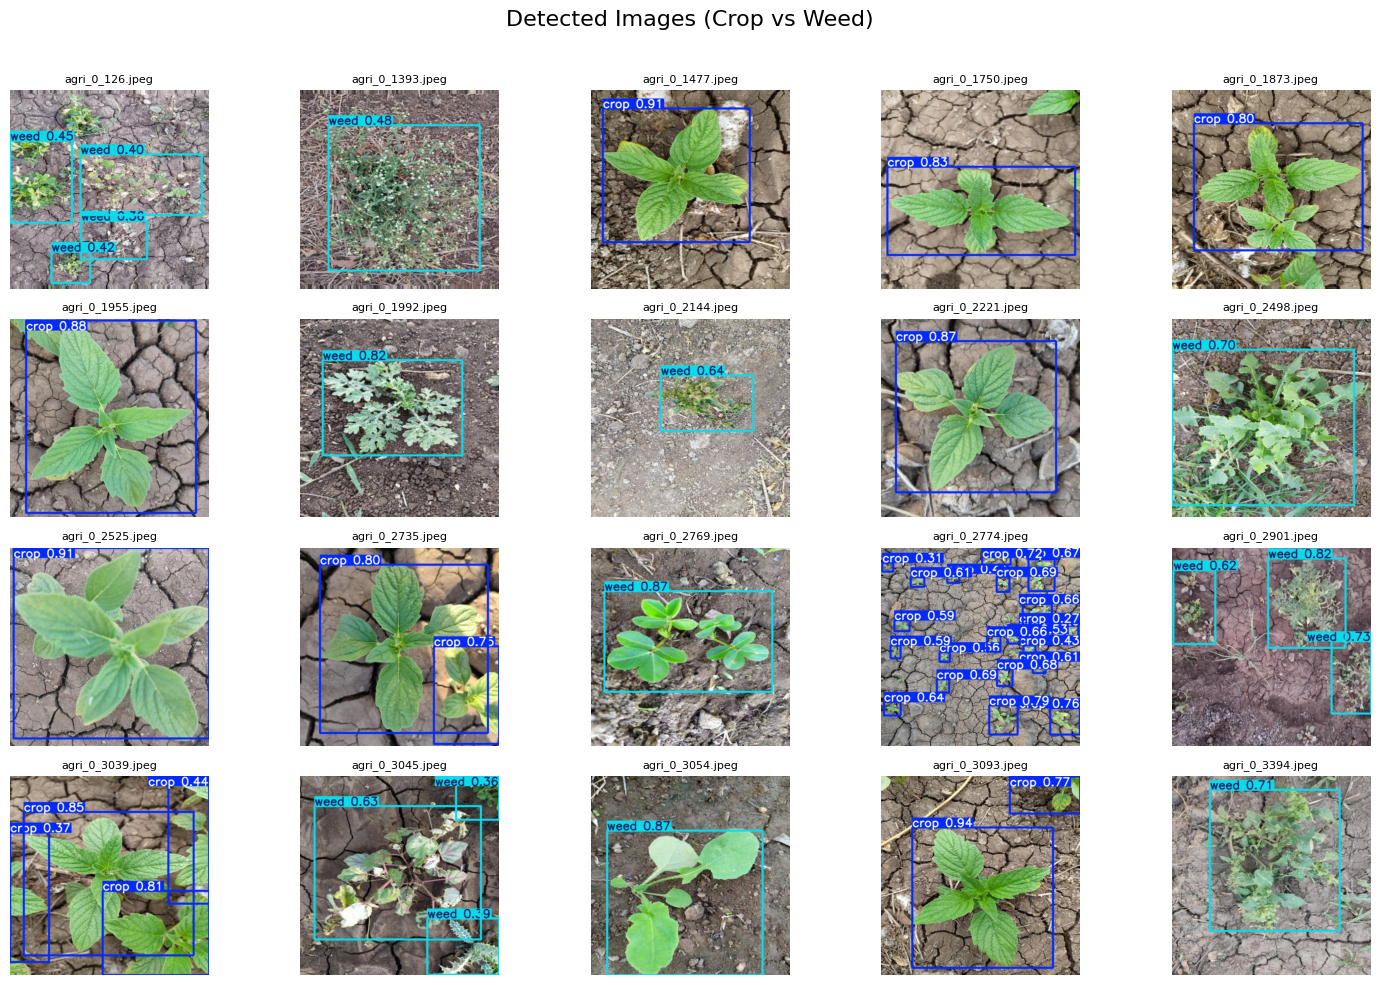

In [ ]:
import glob
from PIL import Image
import matplotlib.pyplot as plt

# Get images (supports .jpg, .jpeg, .png)
image_paths = sorted(glob.glob('/content/detection/*.*'))[:20]  # Limit to 20

# Set up the figure
fig, axes = plt.subplots(nrows=4, ncols=5, figsize=(15, 10))
fig.suptitle("Detected Images (Crop vs Weed)", fontsize=16)

# Flatten the 2D axes array
axes = axes.flatten()

# Loop through and plot
for i, img_path in enumerate(image_paths):
    img = Image.open(img_path)
    axes[i].imshow(img)
    axes[i].set_title(img_path.split("/")[-1], fontsize=8)
    axes[i].axis('off')

# Hide unused subplots (if fewer than 20)
for j in range(len(image_paths), 20):
    axes[j].axis('off')

plt.tight_layout()
plt.subplots_adjust(top=0.90)  # adjust space for title
plt.show()
